In [ ]:
!pip install langdetect

In [ ]:
!pip install pyLDAvis

In [6]:
# not necessary
# added to suppress warnings coming from pyLDAvis

import warnings
warnings.filterwarnings('ignore')

# plotting
import matplotlib.pyplot
%matplotlib inline

In [23]:
import langdetect  # language detection
import nltk  # natural language processing
from nltk.corpus import words
from nltk.stem.wordnet import WordNetLemmatizer
import numpy  # arrays and matrices
import pandas  # dataframes
import pyLDAvis  # plotting
import pyLDAvis.sklearn  # plotting
import regex  # regular expressions
import string
from unicodedata import normalize
import sklearn  # machine learning

import spacy
import spacy_spanish_lemmatizer

from html import unescape

from joblib import Parallel, delayed

In [8]:
# installing specific word dictionarys
# used for stopword removal and lemmatization

nltk.download("words")
nltk.download("wordnet")
nltk.download("stopwords")

nlp = spacy.load("es_core_news_sm")
nlp.replace_pipe("lemmatizer", "spanish_lemmatizer")

[nltk_data] Downloading package words to /home/alexander/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/alexander/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/alexander/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
path = 'vacantes_cargos.xlsx'
df = pandas.read_excel(path, sheet_name="Hoja1")
df.head()

,cargo
0,cajero
1,cajero
2,asesor tecnico
3,asesor tecnico
4,abastecedor operarios produccion


In [10]:
#df = df[["cargo", "Descripcion", "Fecha de publicacion", "Fecha de expiracion"]]
#df.columns

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84569 entries, 0 to 84568
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cargo   84569 non-null  object
dtypes: object(1)
memory usage: 660.8+ KB


In [12]:
#df = df.drop_duplicates()
#df.info()

In [13]:
# define quick look function for data frame

def dataframe_quick_look(df, nrows):
    print("SHAPE:\n{shape}\n".format(shape=df.shape))
    print("COLUMN NAMES:\n{names}\n".format(names=df.columns))
    print("HEAD:\n{head}\n".format(head=df.head(nrows)))
    
dataframe_quick_look(df, nrows=2)

SHAPE:
(84569, 1)

COLUMN NAMES:
Index(['cargo'], dtype='object')

HEAD:
    cargo
0  cajero
1  cajero



In [14]:
# data set came with prespecified topics
# print the topics out with counts

print("TOPICS:\n{topics}\n".format(topics=df["cargo"].value_counts()))

TOPICS:
asesor comercial                           1678
auxiliar contable                           556
administrador                               510
auxiliar bodega                             495
auxiliar enfermeria                         476
                                           ... 
escolta aereo villavicencio                   1
asesor integrall belen umbria risaralda       1
jefe enfermeria pep                           1
motorizados sin domiciliarios                 1
operario pluma                                1
Name: cargo, Length: 32774, dtype: int64



In [15]:
# view final data that will be carried forward

raw = df['cargo'].tolist()
print("HEADLINES:\n{lines}\n".format(lines=raw[:2]))
print("LENGTH:\n{length}\n".format(length=len(raw)))

HEADLINES:
['cajero', 'cajero']

LENGTH:
84569



In [16]:
include_stopwords = {'mas', 'menos', 'null', 'none', 'nan', 'na', 'am', 'pm', 'rifle', 'american', 'eagle', 'group', 
 'sena', 'sanitas', 'coorserpark', 'siberia', 'emi', 'tronix', 'ii', 'daviplata', 'gracias',
 'asdasd', 'nov', 'simex', 'reional', 'bienvenido', 'regional', 'adecco', 'cav', 'buscando',
 'favor', 'aplica', 'armenia', 'gustaria', 'ser', 'metlife', 'fin', 'dar', 'datamarshall', 'importante', 
 'multinaciona', 'aproximadamente', 'necesitaras', 'for', 'marblehh', 'com', 'cali', 'jyb', 'americas',
 'an', 'cargo', 'invitamos', 'apliques', 'vacante', 'salario', 'prestaciones', 'ubicada', 
 'hojasdevida', 'bogota', 'funza', 'madrid', 'desempen', 'ar', 'mensual', 'acuerdo', 'compan',
 'medellin', 'ciudad', 'domingo', 'lunes', 'martes', 'miercoles', 'jueves', 'viernes','sabado',  
 'aplican', 'dinero', 'horario', 'deben', 'vivir', 'indispensable', 'alrededores',
 'fontibon', 'montevideo', 'solo', 'pagan', 'si', 'no', 'horarios', 'debes', 'tener', 'chileno',
 'calendario', 'lugar', 'realizaran', 'datamarch', 'google', 'etc', 'bps', 'kc', 'realiza', 
 'sigue', 'interesado', 'smlv', 'minimo', 'recargos', 'dominicales', 'festivos', 'ninguna', 
 'gold', 'quieres', 'fin', 'gana', 'clara', 'vision', 'precios', 'tipos', 'diversos', 'lograr',
 'afines', 'medio', 'dia', 'minima', 'arse', 'realizando', 'funciones', 'utilizar',
 'usado', 'increible', 'confortable', 'vacantes', 'unete', 'ofrecemos', 'encargara', 'fijo',
 'hola', 'encontramos', 'busca', 'encuentra', 'remitida', 'jorge', 'tadeo', 'cuales', 'encuentren',
 'ultimos', 'requiere', 'meses', 'os', 'incentivos', 'buscamos', 'cada', 'cumples', 'dudes',
 'poder', 'realizar', 'ahora', 'or', 'espirit', 'rifle', 'american', 'eagle', 'mng',
 'star', 'turnos', 'rotativos', 'americanino', 'chevignon', 'esprit', 'naf', 'debe', 'mision',
 'to', 'familia', 'llena', 'great', 'claro', 'periodo', 'sabes', 'secreto', 'personas',
 'animas', 'unirte', 'mano', 'requerimos', 'semestre', 'semestres', 'compensar', 'cualquiera', 
 'postulate', 'invitamos', 'dentro', 'domino', 'dominos', 'mosquera', 'turno', 'centromedellin',
 'pizza', 'dp', 'archies', 'starbucks', 'brindando', 'len', 'carbon', 'disponible', 'deseo',
 'mcdonalds', 'franquiciado', 'dorados', 'mayor', 'registrarte', 'mediante', 'thomas', 'dos',
 'saint', 'puesto', 'asi', 'contribuyendo', 'contamos', 'mise', 'and', 'steward', 'beer', 'todas',
 'suba', 'pinar', 'mesa', 'bar', 'amplia', 'total', 'altos', 'norte', 'man', 'afines', 'proximo',
 'barranquilla', 'apartado', 'reto', 'metlife', 'manizales', 'cuente', 'copacabana', 'acompan',
 'sientes', 'mientras', 'hamburguesas', 'corral', 'exito', 'sur', 'brindar', 'traves', 'urgente',
 'punto', 'zona', 'descanso', 'semana', 'cisco', 'dude', 'prtg', 'solarwinds', 'usando', 'segun',
 'sera', 'siguientes', 'bajo', 'diploma', 'adjuntar', 'fotocopia', 'espan', 'a', 'compass', 
 'honorarios', 'extras', 'menor', 'fines', 'contrato', 'bono', 'areas', 'comunes', 'unicamente',
 'gusto', 'aplicar', 'sede', 'iv', 'bls', 'contar', 'perfil', 'mejor', 'manejo', 'dr', 'vida',
 'hoja', 'pto', 'apertura', 'cierre', 'enviar', 'local', 'popular', 'requerido', 'mensualmente',
 'adecco', 'diesel', 'old', 'mutual', 'monterrey', 'marble', 'bbva', 'coca', 'cola', 'puente',
 'desean', 'cdmx', 'aranda', 'andose', 'tat', 'gasolina', 'men', 'uber', 'eats', 'rappi', 'conscientes', 
 'neidy', 'conformen', 'respecto', 'actuales', 'media', 'etapa', 'encuentre', 'are', 'in', 'maurimar',
 'perfil', 'dar', 'crepes', 'waffles', 'acaba', 'bayport', 'estara', 'nuevo', 'barbosa', 'velez',
 'peso', 'residan', 'blanca', 'preferible', 'tolima', 'flamingo', 'salarial', 'chia', 'residir',
 'preferiblemente', 'vivir', 'vigente', 'teleton', 'antigua', 'gratuito', 'ofrecerte', 'contar',
 'quieran', 'postularse', 'nin', 'fds', 'on', 'horas', 'deseas', 'fines', 'gstar', 'raw', 'mango',
 'haiti', 'quala', 'dominicana', 'to', 'antioquia', 'buscar', 'inferior', 'dulcer','we', 
 'salsas', 'toma', 'va', 'sticker', 'cheese', 'cakes', 'gladys', 'arro', 'hot', 'nevero', 
 'embargo', 'ofrecer', 'saber', 'rotativo', 'casino', 'kenzo', 'jeans', 'similar', 'huawei',
 'ericsson', 'nokia', 'enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 'julio', 'asgosto',
 'septiembre', 'octubre', 'noviembre', 'diciembre', 'suzuki', 'requerir', 'turbo', 'kodiak',
 'doble', 'toyota', 'florida', 'mama', 'papa', 'by', 'salary', 'sad', 'the', 'first', 'of', 
 'with', 'yamaha', 'honda', 'susuki', 'viaticos', 'prestacionales', 'extrapromedio', 'pasto',
 'albania', 'guajira', 'candelaria', 'palmira', 'abstenerse', 'par', 'barrio', 'man', 'perfumer',
 'hombre', 'alto', 'nubia', 'solicitar', 'mina', 'gondola', 'nevera', 'doble', 'tal', 'cafe',
 'harina', 'amarillo', 'cat', 'convenirhorario', 'monday', 'our', 'new', 'is', 'not', 'both',
 'all', 'the', 'best', 'mes', 'despues', 'basico', 'emermedica', 'chaparral', 'persona', 'seria',
 'aportes', 'parafiscales', 'cop', 'hiring', 'bonus', 'is', 'months', 'new', 'seeking', 'hard',
 'santo', 'marta', 'contemplar', 'jeans', 'leggins', 'tenis', 'max', 'gmail', 'joven', 'adulto',
 'nota', 'pdf', 'marmato', 'windsor', 'agro', 'max', 'festivossalario', 'ver', 'dry', 'tipo',
 'long', 'year', 'kilo', 'metro', 'podras', 'disponibles', 'buenos', 'parte', 'drill', 
 'informal', 'formal', 'permoda', 'brasier', 'gigas', 'lavador', 'corar', 'tocancipa', 
 'ideal', 'mapowergroup', 'colombianos', 'johnson', 'kellogg', 'algun', 'comisioneshorario',
 'domingos', 'sabados', 'consolidarse', 'snacks', 'steam', 'robotschool', 'buen', 'despues',
 'prestacion', 'agendar', 'inferior', 'diurno', 'pulsar', 'determinar', 'adelante', 'one', 
 'referente', 'sepa', 'mb', 'etb', 'vodafone', 'directv', 'viernessalarios', 'amazing',
 'solvo', 'dolares', 'bonos', 'off', 'rethus', 'colombia', 'leyturnos', 'llanogrande',
 'buscanos', 'ten', 'crees', 'pie', 'verificable', 'tulua', 'bogotatecnico', 'vacantesalario',
 'casinopostulate', 'laserhorario', 'april', 'party', 'huge', 'china', 'sabadosfunciones',
 'manga', 'pijamas', 'socialessi', 'pulpo', 'bogotahorario', 'megamiken', 'soldaduratecnico',
 'plantase', 'deseable', 'padre', 'mitsubishi', 'metalmecanicoindispensable', 'microsoftinstalacion',
 'mismo', 'medellinnota', 'vecino', 'seguimientocompetencias', 'latinoamerica', 'negro', 'negra',
 'bolivar', 'rotativossalario', 'medellinhabilidades', 'trabajoexperiencia', 'antioquen', 
 'gestionhabilidadesproactivamanejo', 'pronosticosconocimiento', 'patio', 'indefinidovivir',
 'cargobasico', 'medellinhorario', 'cafetero', 'bus', 'dominical', 'rapido', 'medicosestablecer',
 'ceramicapara', 'asertivaproactividad', 'mslv', 'rotativosexcelente', 'medellinsalario', 'casinos',
 'mimina', 'incapacidadescarnetizacionconocimiento', 'cafeter', 'floridablanca', 'galapa',
 'magdalena', 'facebookcreacion', 'iran', 'friday', 'caldasbachillerexperiencia', 'legalesvivir',
 'seguridadbachillersalario', 'weekly', 'taiwan', 'crecimientomodalidad', 'triple', 'mensualessalario',
 'principal', 'latinoamerica', 'renault', 'leypromedio', 'leycapacitacion', 'colombiabuscamos',
 'mimo', 'poblado', 'caracteristicasinternet', 'computrabajo', 'inversionrealizar', 'hispania',
 'industrialexperiencia', 'bachilleresfunciones', 'descripcionbuscamos', 'mercedes', 
 'carrotanqueexperiencia', 'diane', 'pig', 'refrigeranteindispensable', 'sabadoimportante',
 'hotmail', 'llanos', 'sagaroflowers', 'leycontrato', 'rionegrocalipalmirabuga', 'pricemart',
 'chefrito', 'homecenter', 'bachillerexperiencia', 'triplex', 'pigtail', 'mismoverificar',
 'rionegropreferiblemente', 'yale', 'humanossalario', 'administrativasdeben', 'trabajadoresconciliaciones',
 'abejorralguarnesonsonvinculacion', 'casinocontrato', 'mosquerahorario', 'indefinidotrabaja', 
 'bono', 'extralegales', 'artesanaleselaboracion', 'mice', 'crema', 'montenegro', 'zunilda',
 'beef', 'bachillerindispensable', 'orange', 'medellinrequisitos', 'llamado', 'leyfirma',
 'familiahorariorotativo', 'infraestructuratecnicos', 'eliot', 'minerva', 'requisitoseducaciontecnologo',
 'administrativaselectricidadelectromecanicos', 'anteriormenteestudios', 'monthlybasic',
 'competitivebe', 'englisha', 'friday', 'otroherramientas', 'dadas', 'distrital', 'muestra',
 'impala', 'always', 'soap', 'medellinhabilidades', 'restwoocommercemicroservicesconocimientos', 
 'beneficioscontratacion', 'atlantic', 'bachillerhorarios', 'tecnologiadomingo', 'fresno',
 'refrigeracionindispensable', 'bachillerexperiencia', 'superetesauxilio', 'requisitosexperiencia',
 'maquinariaconocimiento', 'virginia', 'cableminimo', 'requisitostener', 'clienterequisitos', 
 'mototener', 'computadorwindows', 'villavicencioexperiencia', 'dada', 'importanterethusresoluciontener',
 'cartagena', 'maya', 'leytodo', 'mercanciainventarioscomunicacion', 'bachillerfunciones',
 'certificadajornada', 'andes', 'geisha', 'floridarequiere', 'bachillerindispensable',
 'vermont', 'bachilleratoexperiencia', 'sandy', 'thor', 'militarfotocopia', 'urbina', 
 'casinonivel', 'leycontrato', 'carolina', 'bobcat', 'americana', 'mensuales', 'passwords', 'europa',
 'hombrebachillersituacion', 'automotorequisitos', 'productivoconocimientos', 'invisible',
 'gemini', 'cuba', 'indigo', 'adelanteautomatica', 'bachillerrequisitos', 'mensajerotener',
 'medicamentosimportante', 'van', 'motoressuspensiom', 'tahiti', 'ciudadrequisitos', 'lili',
 'poker', 'creemos', 'renal', 'sushi', 'pasta', 'zeuss', 'sexo', 'extralegalescontrato', 'mediodia',
 'sino', 'covid', 'medellinfuncionesrealizar', 'alamos', 'llamado', 'fedex', 'bachillerescondicionessalario',
 'contribuiral', 'luis', 'colombiabuscamos', 'popayanriohachasincelejotumacoyopalbarranquillaenviar',
 'maternidadcontratacion', 'barranquillaestudios', 'bancolombia', 'inmediatafunciones', 
 'valledupar', 'bogotafunciones', 'armeniaescolaridad', 'chile', 'bachillertipo', 'produccionhorario',
 'casinoexperiencia', 'laborindispensable', 'antibacterial', 'medellinpreferiblemente', 'surfunciones', 
 'instalacionesrequisitosjornada', 'manpowergroup', 'serviciocotizacionesrecuperacion', 'nevada',
 'italo', 'convocatoriareconocida', 'mensuales', 'laboral', 'techopromedio', 'rotativosformacion',
 'igual', 'academicasseguimiento', 'tecnologicasinnovadorasrequisitos', 'buscamosbuscamos',
 'acacias', 'sunday', 'jestexperience', 'italian', 'saltpeter', 'soda', 'caterpillar', 'ford',
 'dieselalineacion', 'disco', 'estipuladosconfeccionar', 'boxer', 'zigzag', 'jeanshorario', 
 'melaninas', 'closet', 'leycontrato', 'diapagos', 'weekend', 'uk', 'malta', 'canada',
 'australia', 'nueva', 'zelanda', 'candidato', 'bigpass', 'labor', 'home', 'almuerzo',
 'hallar', 'laborado', 'molde', 'arena', 'pvc', 'ten', 'zinc', 'trainingweekly', 'paymentsbar',
 'bonuses', 'mls', 'caring', 'loved', 'mission', 'during', 'pandemic', 'at', 'afternoon',
 'evening', 'availability', 'needed', 'including', 'colombian', 'monthly', 'minimum', 'valormanejo',
 'opencomexindispensable', 'xxi', 'muisca', 'bavaria', 'multinacional', 'bogotaexperiencia',
 'internos', 'completorequisitos', 'bachillertecnico', 'drywall', 'cercano', 'edad', 'laborar',
 'experta', 'officecompensacion', 'taxis', 'funcionessalario', 'oscargo', 'inconveniente', 
 'canada', 'pro', 'marcasamsung', 'still', 'reimond', 'prima', 'beneficios', 'miel', 'llamada',
 'friko', 'andres', 'cuerquia', 'semanal', 'festivo', 'academicolicencia', 'vigilantesin',
 'unitariaspruebas', 'kiss', 'plus', 'zeus', 'recargo', 'nocturno', 'excelente', 'unido',
 'laborpagos', 'mensualeshorario', 'diario', 'metal', 'limpio', 'sogamososalario', 'barrios',
 'unidos', 'listos', 'sentry', 'pepeganga', 'moto', 'siguiente', 'bogotamedellin', 'bolivia',
 'cerritopastohipialeshombres', 'foodie', 'sas', 'poke', 'nasa', 'wendy', 'dell', 'peru',
 'mexico', 'good', 'proven', 'politico', 'base', 'brief', 'ray', 'ban', 'jobandtalent',
 'lujo', 'busqueda', 'pagado', 'directamente', 'extrassalario', 'extraspar', 'manpower', 
 'victimas', 'violencia', 'sexual', 'bueno', 'hogarexperiencia', 'rock', 'hd', 'camara', 
 'comision', 'megas', 'diadema', 'free', 'latin', 'america', 'welcoming', 'june', 'december',
 'each', 'elusive', 'often', 'apple', 'good', 'strong', 'extralegal', 'bonuses', 'people',
 'convenir', 'ola', 'clientecoordinar', 'risaralda', 'caimailito', 'sencillosalario',
 'remate', 'bpcontar', 'audi', 'kia', 'gama', 'acaciasaguachicacartagocaucasiaespinalflorenciaibaguela',
 'doradamocoapopayanriohachasincelejotumacoyopalbarranquillaenviar', 'radicado', 'norteamericanos',
 'mercadeovinculacion', 'aprendizajeremuneracion', 'onelink', 'autonal', 'desinfeccionhorario',
 'rotativossmlv', 'tambien', 'poda', 'laborar', 'medellinmujeres', 'protocoloinspecciona',
 'pen', 'on', 'grandes', 'superficies', 'enduro', 'pago', 'smmlv', 'sabadorequisitos',
 'sed', 'varios', 'abc', 'minina', 'urbanolider', 'confinadoscurso', 'horascondicionessalario',
 'momento', 'cosmeticospreferiblemente', 'funcionesventa', 'funcionesrealizar', 'seran',
 'alcoholimetriarealizadas', 'homologable', 'cc', 'vehiculo', 'electronicoplataformas',
 'prestacioneshorario', 'documento', 'rotativossi', 'incluir', 'rural', 'actualizado',
 'semanasalario', 'inportante', 'presentarse', 'uniforme', 'tecnicasdeben', 'healthy',
 'sports', 'stands', 'pertenencia', 'multinivelespersonal', 'celta', 'park', 'depender',
 'poseer', 'robusto', 'bachilleringles', 'colombiano', 'descansar', 'unidosrequisito', 
 'detergente', 'hino', 'procesador', 'ram', 'gb', 'redsolo', 'ana', 'mlv', 'variable',
 'interesados', 'cumplir', 'land', 'demas', 'necesidad', 'volvo', 'karen', 'yisel', 'arias',
 'economicopostula', 'tubo', 'plastico', 'casinohorarios', 'rotativoscontrato', 'obra',
 'deliver', 'excellent', 'three', 'years', 'positionsteaching', 'boynton', 'beach', 'florido',
 'other', 'preschool', 'full', 'main', 'texas', 'taskfor', 'as', 'almacencompetencias', 
 'clientetrabajo', 'small', 'pop', 'gondolas', 'whiskas', 'pet', 'cargoprofesion', 'fid',
 'quimicosexperiencias', 'yogurt', 'temperatura', 'color', 'tinto', 'gel', 'disney', 'marvel',
 'nickelodeon', 'knit', 'pink', 'zig', 'zag', 'man', 'citadas', 'reunion', 'allison', 'morales',
 'copia', 'ampliado', 'frio', 'book', 'exitos', 'city', 'hunter', 'mago', 'acrobatas', 'drama',
 'villavicencio', 'acacia', 'termino', 'visa', 'princesa', 'superheroes', 'cctv', 'camara',
 'apto', 'examen', 'caracterizarse', 'bogotarequisitos', 'aprendizajeasignacion', 'smlvhorario',
 'bogotaimportante', 'tiempo', 'completo', 'polar', 'esten', 'habilitado', 'socialremuneracion',
 'smmlvotros', 'disponer', 'tenerconocimiento', 'ecuador', 'creamosdiagnosticar', 'sesion',
 'telefono', 'chiller', 'estadio', 'palmaseca', 'solicita', 'busqueda', 'agileslenguajes', 'informacionservicio',
 "mas", "menos", "null", "none", "strong", "quote", 'anho', 'anhos',
 'about', 'adicional', 'afin', 'applicant', 'asignado', 'avanzado', 'client', 'companhia', 
 'conocimiento', 'conocimientos', 'contact', 'debera', 'description', 'espacio', 'excel', 
 'garantizar', 'nivel', 'offer', 'pequenho', 'solicitud', 'successful', 'what'}

In [17]:
def clean_html(text):
    cleantext = unescape(text)
    cleanr = regex.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
    cleantext = regex.sub(cleanr, ' ', cleantext)
    return cleantext

In [18]:
# check language of headline
# filter to english only

def do_language_identifying(txt):
    try: the_language = langdetect.detect(txt)
    except: the_language = 'none'
    return the_language

In [19]:
# define function to perform lemmatization

def do_lemmatizing(txt):
    text_lemma = nlp(txt)
    tokens = [word.lemma_ for word in text_lemma]
    return tokens
    #out = WordNetLemmatizer().lemmatize(wrd)
    #return (wrd if out is None else out)

In [24]:
# define function to cleaning tweet data

def do_text_cleaning(txt):
    
    # txt = clean_html(txt)
    
    # txt = txt.lower()
       
    # # identify language of tweet
    # # return null if language not english
    # lg = do_language_identifying(txt)
    # if lg != 'es':
    #     return None
    
    # # lemmatizing
    # #out = [do_lemmatizing(i) for i in out]
    # #txt = " ".join(do_lemmatizing(txt))
    
    # # Remove text in square brackets, remove punctuation and remove words containing numbers.
    # txt = txt.replace("ñ", "nh")
    # txt = regex.sub(r"\[.*?¿\]\%", " ", txt)
    # txt = regex.sub(r"https://", "", txt)
    # txt = regex.sub(r"www.", "", txt)
    # txt = regex.sub(r"[‘’“”…«»]", "", txt)
    # txt = regex.sub(r'["\[\]\{\}]', "", txt)
    # txt = regex.sub(r"_", " ", txt)
    # txt = regex.sub(r"[%s]" % regex.escape(string.punctuation), " ", txt)
    # txt = regex.sub(r"\w*\d\w*", "", txt)
    # txt = regex.sub(
    #     r"([^n\u0300-\u036f]|n(?!\u0303(?![\u0300-\u036f])))[\u0300-\u036f]+", r"\1", 
    #     normalize("NFD", txt), 0, regex.I
    # )
    # txt = regex.sub(r"\n", " ", txt)
    # txt = regex.sub(r"&lt;/?.*?&gt;", " &lt;&gt; ", txt)

    # # Eliminar caracteres que se repitan más de dos veces seguidas
    # pattern = regex.compile(r"(.)\1{2,}")
    # txt = pattern.sub(r"\1\1", txt)

    
    # split the string on whitespace
    out = txt.split(' ')
   
    
    # # identify screen names
    # # replace with SCREENNAME
    # out = ['SCREENNAME' if i.startswith('@') else i for i in out]
    
    # # identify urls
    # # replace with URL
    # out = [
    #     'URL' if bool(regex.search('http[s]?://', i)) 
    #     else i for i in out
    # ]
    
    # # remove all punctuation
    # out = [regex.sub('[^\\w\\s]|\n', '', i) for i in out]
    
    # # make all non-keywords lowercase
    # keys = ['SCREENNAME', 'URL']
    # out = [i.lower() if i not in keys else i for i in out]
    
    # # remove keywords
    # out = [i for i in out if i not in keys]
    
    # remove stopwords
    list_stop_words = set(nltk.corpus.stopwords.words('spanish'))
    list_stop_words |= include_stopwords
    list_stop_words = [regex.sub('[^\\w\\s]', '', i) for i in list_stop_words]
    
    out = [i for i in out if i not in list_stop_words]
    
    # keep words 4 or more characters long
    out = [i for i in out if len(i) >= 3]
    
    return out

In [25]:
# apply cleaning function to every tweet

#clean = list(map(do_text_cleaning, raw))

In [27]:
parallel = Parallel(n_jobs=8)(delayed(do_text_cleaning)(txt) for txt in raw)
parallel[:5]

[['cajero'],
 ['cajero'],
 ['asesor', 'tecnico'],
 ['asesor', 'tecnico'],
 ['abastecedor', 'operarios', 'produccion']]

In [28]:
clean = parallel

In [29]:
#pd.DataFrame(data=clean, columns=["data"]).to_csv("vacantes_cargos_lemma.csv")

In [30]:
#clean = pd.read_csv("vacantes_cargos_lemma.csv").data.tolist()

In [31]:
# remove none types

clean = list(filter(None.__ne__, clean))
print("HEADLINES:\n{lines}\n".format(lines=clean[:2]))
print("LENGTH:\n{length}\n".format(length=len(clean)))

HEADLINES:
[['cajero'], ['cajero']]

LENGTH:
84569



In [32]:
# turn tokens back into strings
# concatenate using whitespaces

clean_sentences = [" ".join(i) for i in clean]
clean_sentences[0:5]

['cajero',
 'cajero',
 'asesor tecnico',
 'asesor tecnico',
 'abastecedor operarios produccion']

### Count Vectorizer

In [33]:
# define some global variables

number_words = 10
number_docs = 10
number_features = 1000

In [44]:
# execute bag of words model
# use raw term counts for lda 
# as it is a probabilistic graphical model

vectorizer1 = sklearn.feature_extraction.text.CountVectorizer(
    analyzer="word",
    max_df=0.5, 
    min_df=100, 
    max_features=number_features
)
clean_vec1 = vectorizer1.fit_transform(clean_sentences)
print(clean_vec1[0])

feature_names_vec1 = vectorizer1.get_feature_names()

  (0, 45)	1


In [45]:
feature_names_vec1

['abogado',
 'administracion',
 'administrador',
 'administrativa',
 'administrativo',
 'agent',
 'agente',
 'agentes',
 'alimentos',
 'almacen',
 'almacenes',
 'almacenista',
 'alturas',
 'ambiental',
 'analista',
 'analyst',
 'aprendiz',
 'archivo',
 'area',
 'arquitecto',
 'aseo',
 'asesor',
 'asesora',
 'asesores',
 'asistente',
 'atencion',
 'auditor',
 'auditoria',
 'automotriz',
 'aux',
 'auxiliar',
 'auxiliares',
 'aval',
 'ayudante',
 'bachiller',
 'bachilleres',
 'back',
 'bacteriologo',
 'bancario',
 'banco',
 'bilingual',
 'bilingue',
 'bodega',
 'bucaramanga',
 'cajera',
 'cajero',
 'cajeros',
 'calidad',
 'call',
 'callcenter',
 'calle',
 'campo',
 'canal',
 'cargue',
 'carreras',
 'cartera',
 'casa',
 'center',
 'centro',
 'certificado',
 'chat',
 'civil',
 'cliente',
 'cobranza',
 'cobranzas',
 'cocina',
 'cocinero',
 'colocacion',
 'comercial',
 'comerciales',
 'comercio',
 'compras',
 'conductor',
 'conductores',
 'confeccion',
 'construccion',
 'consultor',
 'consumo

### Select Number of Topics

In [52]:
# define function to calculate perplexity for LDA model trained on ntopics

def perplexity_by_ntopic(data, ntopics):
    output_dict = {
        "Number Of Topics": [], 
        "Perplexity Score": []
    }
    
    for t in ntopics:
        lda = sklearn.decomposition.LatentDirichletAllocation(
            n_components=t,
            learning_method="online",
            random_state=0,
            n_jobs=-1
        )
        lda.fit(data)
        
        output_dict["Number Of Topics"].append(t)
        output_dict["Perplexity Score"].append(lda.perplexity(data))
        
    output_df = pandas.DataFrame(output_dict)
    
    index_min_perplexity = output_df["Perplexity Score"].idxmin()
    output_num_topics = output_df.loc[
        index_min_perplexity,  # index
        "Number Of Topics"  # column
    ]
        
    return (output_df, output_num_topics)

In [53]:
# find perplexity scores for several different numbers of topics
# takes several minutes

df_perplexity, optimal_num_topics = perplexity_by_ntopic(
    clean_vec1, 
    ntopics=[1, 2, 3, 4, 6, 8, 10, 11, 12, 13, 14, 15]
)
print(df_perplexity)

    Number Of Topics  Perplexity Score
0                  1        147.201607
1                  2        134.623071
2                  3        146.802184
3                  4        151.750614
4                  6        176.951113
5                  8        178.975362
6                 10        171.637163
7                 11        179.357246
8                 12        183.228095
9                 13        180.128409
10                14        197.085822
11                15        190.756858


<AxesSubplot:xlabel='Number Of Topics'>

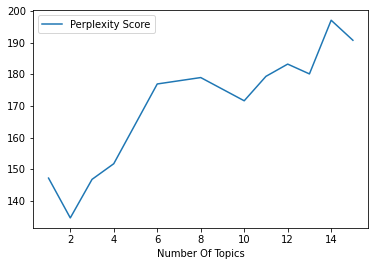

In [54]:
df_perplexity.plot.line("Number Of Topics", "Perplexity Score")

In [64]:
optimal_num_topics = 10

In [65]:
# define and fit LDA model

lda = sklearn.decomposition.LatentDirichletAllocation(
    n_components=optimal_num_topics,
    learning_method="online",
    random_state=0,
    n_jobs=-1
)
lda.fit(clean_vec1)

LatentDirichletAllocation(learning_method='online', n_jobs=-1, random_state=0)

In [66]:
# output matrix
# h: docs to topics

lda_transform = lda.transform(clean_vec1)
print(lda_transform.shape)
print(lda_transform)

(84569, 10)
[[0.05       0.05       0.05       ... 0.05       0.05       0.05      ]
 [0.05       0.05       0.05       ... 0.05       0.05       0.05      ]
 [0.03333333 0.03333333 0.03333333 ... 0.03333333 0.7        0.03333333]
 ...
 [0.1        0.1        0.1        ... 0.1        0.1        0.1       ]
 [0.1        0.1        0.1        ... 0.1        0.1        0.1       ]
 [0.1        0.1        0.1        ... 0.1        0.1        0.1       ]]


In [67]:
# output matrix
# w: words to topics

lda_components = lda.components_
print(lda_components.shape)
print(lda_components)

(10, 325)
[[6.13312671e+01 1.00012805e-01 1.00000287e-01 ... 1.00000949e-01
  1.00004244e-01 1.00001374e-01]
 [1.00000002e-01 1.00004276e-01 1.00001242e-01 ... 1.22013127e+02
  1.00000989e-01 1.96275469e+02]
 [1.00000003e-01 1.00011294e-01 1.00000338e-01 ... 1.00005484e-01
  1.00006579e-01 1.00000098e-01]
 ...
 [1.00000167e-01 1.00015102e-01 1.00000539e-01 ... 1.00004394e-01
  1.00000270e-01 1.00003123e-01]
 [1.00000209e-01 1.00005884e-01 1.00000307e-01 ... 1.00001271e-01
  1.00003344e-01 1.00001227e-01]
 [1.00001009e-01 1.00013151e-01 1.00001459e-01 ... 1.00000601e-01
  2.50564926e+02 1.00006944e-01]]


In [68]:
# define function to reformat output matrices into easily readable tables

def get_topics(mod, vec, names, docs, ndocs, nwords):
    # word to topic matrix
    W = mod.components_
    W_norm = W / W.sum(axis=1)[:, numpy.newaxis]
    # topic to document matrix
    H = mod.transform(vec)
    
    W_dict = {}
    H_dict = {}
    
    for tpc_idx, tpc_val in enumerate(W_norm):
        topic = "Topic{}".format(tpc_idx)
        
        # formatting w
        W_indices = tpc_val.argsort()[::-1][:nwords]
        W_names_values = [
            (round(tpc_val[j], 4), names[j]) 
            for j in W_indices
        ]
        W_dict[topic] = W_names_values
        
        # formatting h
        H_indices = H[:, tpc_idx].argsort()[::-1][:ndocs]
        H_names_values = [
            (round(H[:, tpc_idx][j], 4), docs[j]) 
            for j in H_indices
        ]
        H_dict[topic] = H_names_values
        
    W_df = pandas.DataFrame(
        W_dict, 
        index=["Word" + str(i) for i in range(nwords)]
    )
    H_df = pandas.DataFrame(
        H_dict,
        index=["Doc" + str(i) for i in range(ndocs)]
    )
        
    return (W_df, H_df)

In [69]:
# run function

W_df, H_df = get_topics(
    mod=lda,
    vec=clean_vec1,
    names=feature_names_vec1,
    docs=raw,
    ndocs=number_docs, 
    nwords=number_words
)

In [71]:
# word-topic table
print(W_df)

                         Topic0                        Topic1  \
Word0        (0.2265, operario)          (0.169, coordinador)   
Word1      (0.1377, produccion)              (0.0935, bodega)   
Word2       (0.0816, tecnologo)  (0.0608, telecomunicaciones)   
Word3       (0.0573, operarios)            (0.0585, asesores)   
Word4       (0.0439, asistente)            (0.054, mensajero)   
Word5         (0.0353, gestion)            (0.051, alimentos)   
Word6     (0.0333, operaciones)          (0.0484, auxiliares)   
Word7         (0.0273, cartera)              (0.0459, ingles)   
Word8  (0.0237, administrativa)             (0.043, farmacia)   
Word9          (0.0232, guarda)          (0.0334, motorizado)   

                      Topic2                   Topic3                  Topic4  \
Word0      (0.1894, cliente)       (0.1651, vendedor)     (0.4949, comercial)   
Word1  (0.1303, experiencia)      (0.1421, ejecutivo)        (0.2046, ventas)   
Word2      (0.0769, credito)   (0.0662, m

In [72]:
# document-topic table
print(H_df)

                                                 Topic0  \
Doc0  (0.82, operario produccion alimento consumo ma...   
Doc1  (0.82, operario produccion yumbo contratacion ...   
Doc2  (0.82, operario produccion contratacion inmedi...   
Doc3  (0.82, asistente contratacion gestion humana t...   
Doc4  (0.82, asistente contratacion gestion humana t...   
Doc5  (0.82, hombres bachilleres que deseen adquirir...   
Doc6  (0.82, hombres bachilleres que deseen adquirir...   
Doc7  (0.82, hombres bachilleres que deseen adquirir...   
Doc8  (0.82, hombres bachilleres que deseen adquirir...   
Doc9  (0.82, hombres bachilleres que deseen adquirir...   

                                                 Topic1  \
Doc0                (0.775, regente farmacia en bodega)   
Doc1            (0.775, auxiliares distribucion bodega)   
Doc2  (0.775, auxiliares bodega picking packing e in...   
Doc3  (0.775, auxiliares bodega picking packing e in...   
Doc4        (0.775, asesores ejecutivos fuerza externa)

### Visualizing LDA

In [73]:
# iterative visualization
# featuring pca biplot and histogram
lda_plot = pyLDAvis.sklearn.prepare(lda, clean_vec1, vectorizer1, R=10)
pyLDAvis.display(lda_plot)

In [ ]:
# define functiont to fit and plot t-SNE model

def plot_tsne(data, threshold):
    # filter data according to threshold
    index_meet_threshold = numpy.amax(data, axis=1) >= threshold
    lda_transform_filt = data[index_meet_threshold]
    
    # fit tsne model
    # x-d -> 2-d, x = number of topics
    tsne = sklearn.manifold.TSNE(
        n_components=2, 
        verbose=0, 
        random_state=0, 
        angle=0.5, 
        init='pca'
    )
    tsne_fit = tsne.fit_transform(lda_transform_filt)
    
    # most probable topic for each headline
    most_prob_topic = []
    for i in range(tsne_fit.shape[0]):
        most_prob_topic.append(lda_transform_filt[i].argmax())
    
    print("LENGTH:\n{}\n".format(len(most_prob_topic)))

    unique, counts = numpy.unique(
        numpy.array(most_prob_topic), 
        return_counts=True
    )

    print("COUNTS:\n{}\n".format(numpy.asarray((unique, counts)).T))
    
    # make plot
    matplotlib.pyplot.figure(figsize=(10,6))
    color_list = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

    for i in list(set(most_prob_topic)):
        indices = [idx for idx, val in enumerate(most_prob_topic) if val == i]
        matplotlib.pyplot.scatter(
            x=tsne_fit[indices, 0], 
            y=tsne_fit[indices, 1], 
            s=0.5, 
            c=color_list[i], 
            label='Topic' + str(i),
            alpha=1
        )
    
    
    matplotlib.pyplot.xlabel('x-tsne')
    matplotlib.pyplot.ylabel('y-tsne')
    matplotlib.pyplot.legend(markerscale=10)

In [ ]:
plot_tsne(data=lda_transform, threshold=0)

In [ ]:
# define and fit nmf model

nmf = sklearn.decomposition.NMF(
    n_components=optimal_num_topics,
    init="nndsvda",
    solver="mu",
    beta_loss="frobenius",
    random_state=0, 
    alpha=0.1, 
    l1_ratio=0.5
)
nmf.fit(clean_vec1)

In [ ]:
# run function to produce nice output tables

W_df, H_df = get_topics(
    mod=nmf,
    vec=clean_vec1,
    names=feature_names_vec1,
    docs=raw,
    ndocs=number_docs, 
    nwords=number_words
)

In [ ]:
# word-topic table
print(W_df)

In [ ]:
# document-topic table
print(H_df)

In [ ]:
# output raw document-topic matrix for t-SNE plot
nmf_transform = nmf.transform(clean_vec1)
print(nmf_transform.shape)
print(nmf_transform)

In [ ]:
# run function to produce t-SNE plot
plot_tsne(data=nmf_transform, threshold=0)